In [2]:
import pandas as pd
ruta_del_archivo = 'kc_house_data.csv'
data = pd.read_csv(ruta_del_archivo)
print(data.head())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

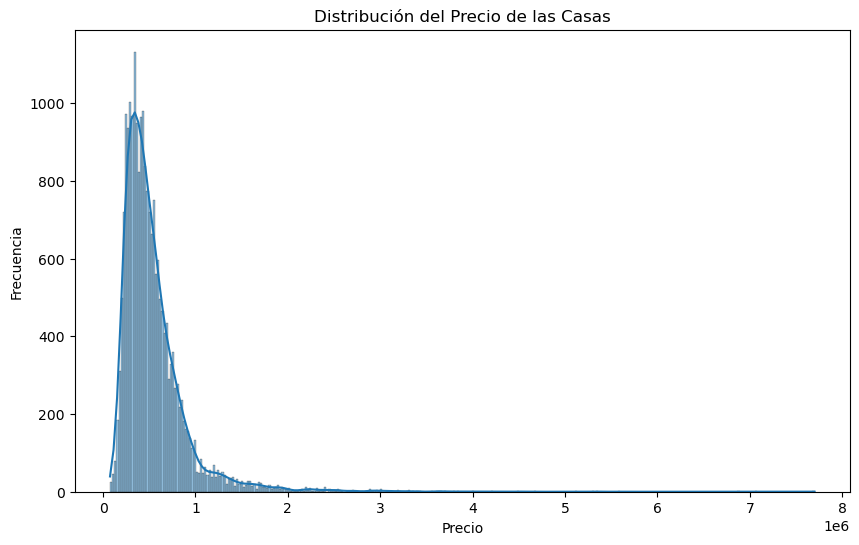

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo (precio de la casa)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución del Precio de las Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

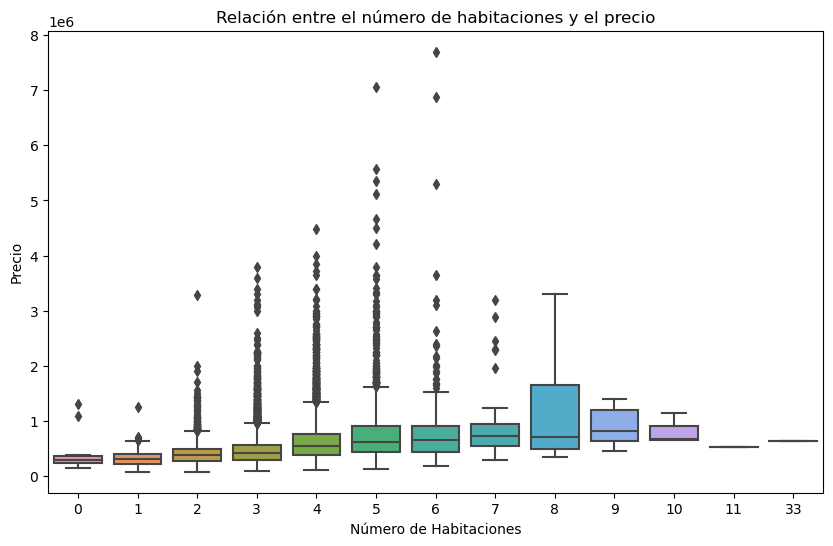

In [6]:
##Identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.title('Relación entre el número de habitaciones y el precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()


In [9]:
print(data.isnull().sum())
data = data.dropna()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


C:\Users\alber\AppData\Local\Temp\ipykernel_2676\1586084223.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


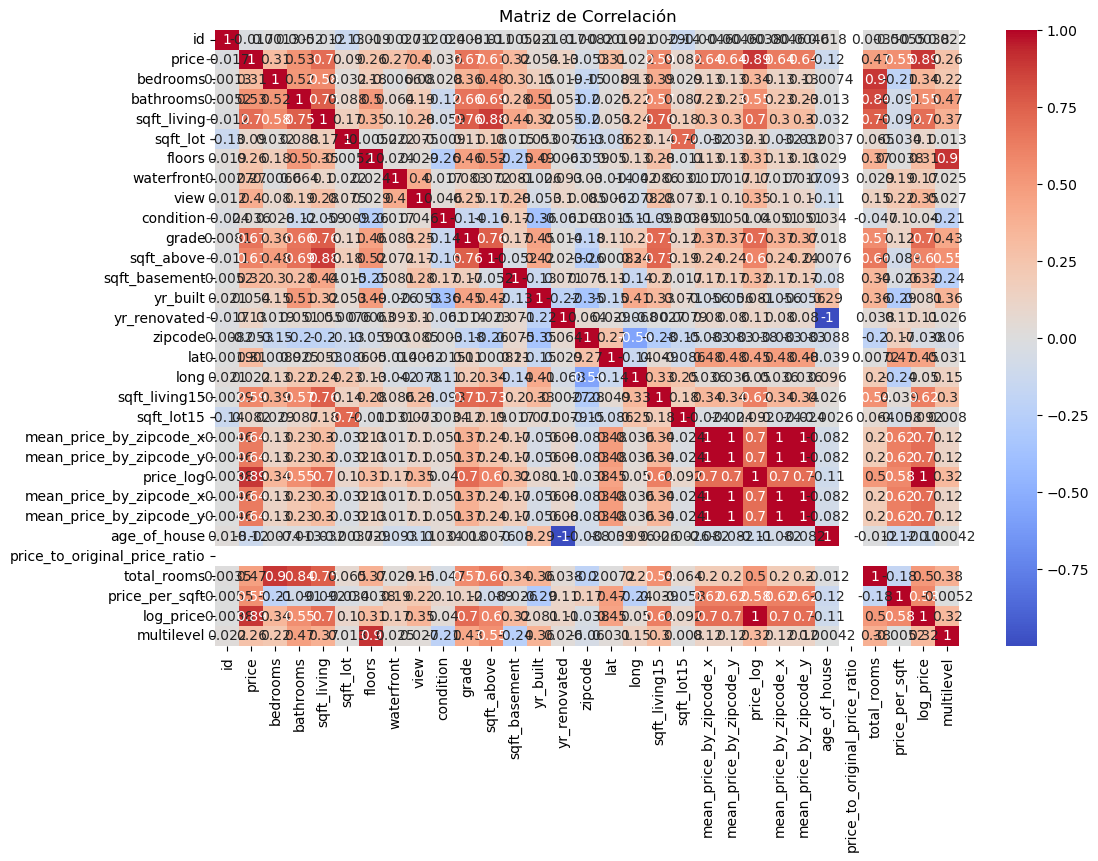

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importa Seaborn

# Carga tus datos y realiza las transformaciones necesarias
# ...

# Calcula la matriz de correlación
correlation_matrix = data.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms']

# nueva característica 'price_per_sqft' que representa el precio por pie cuadrado
data['price_per_sqft'] = data['price'] / data['sqft_living']

# Transformación logarítmica de 'price' para abordar la asimetría de la distribución
data['log_price'] = np.log(data['price'])

# Creación de una nueva característica 'multilevel' que indica si una casa tiene más de un piso
data['multilevel'] = (data['floors'] > 1).astype(int)

In [10]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'data' con tus datos
# Reemplaza esto con la importación de tus datos reales
data = pd.read_csv('kc_house_data.csv')  # Cambia 'tu_archivo.csv' por la ubicación de tu archivo de datos

# Define X_train con las características que deseas utilizar
X_train = data[['price', 'sqft_living', 'floors']]  # Selecciona las características reales que deseas utilizar

# Define y_train con la variable objetivo
y_train = data['price']  # Reemplaza 'target_variable' con el nombre real de tu variable objetivo


Promedio del Error Cuadrado Medio (MSE) a través de 5 folds: 123879469.0135217


In [12]:
model = RandomForestRegressor()

# Realiza la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

print("Promedio del Error Cuadrado Medio (MSE) a través de 5 folds:", mean_mse)

Promedio del Error Cuadrado Medio (MSE) a través de 5 folds: 115055567.65521033


In [14]:
model =AdaBoostRegressor()

# Realiza la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

print("Promedio del Error Cuadrado Medio (MSE) a través de 5 folds:", mean_mse)

Promedio del Error Cuadrado Medio (MSE) a través de 5 folds: 4752408386.561256


In [15]:
model=XGBRegressor()

# Realiza la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()

print("Promedio del Error Cuadrado Medio (MSE) a través de 5 folds:", mean_mse)



Promedio del Error Cuadrado Medio (MSE) a través de 5 folds: 48201064.41088014


In [17]:
##Cálculo de la Media del Precio en Cada Vecindario (Zipcode):
zipcode_mean_price = data.groupby('zipcode')['price'].mean().reset_index()
zipcode_mean_price.rename(columns={'price': 'mean_price_by_zipcode'}, inplace=True)

# Combina la media del precio por zipcode con el DataFrame original
data = data.merge(zipcode_mean_price, on='zipcode', how='left')
print(zipcode_mean_price)

    zipcode  mean_price_by_zipcode
0     98001           2.808047e+05
1     98002           2.342840e+05
2     98003           2.941113e+05
3     98004           1.355927e+06
4     98005           8.101649e+05
..      ...                    ...
65    98177           6.761854e+05
66    98178           3.106128e+05
67    98188           2.890783e+05
68    98198           3.028789e+05
69    98199           7.918208e+05

[70 rows x 2 columns]


In [28]:
# Supongamos que tienes un DataFrame 'data' con tus datos

# Transformación logarítmica de la característica 'precio'
import numpy as np
data['price_log'] = np.log(data['price'])

In [29]:
# Calcula la media del precio de las casas en cada vecindario (zipcode)
zipcode_mean_price = data.groupby('zipcode')['price'].mean().reset_index()
zipcode_mean_price.rename(columns={'price': 'mean_price_by_zipcode'}, inplace=True)

# Combina la media del precio por zipcode con el DataFrame original
data = data.merge(zipcode_mean_price, on='zipcode', how='left')

In [30]:
# Calcula la media del precio de las casas en cada vecindario (zipcode)
zipcode_mean_price = data.groupby('zipcode')['price'].mean().reset_index()
zipcode_mean_price.rename(columns={'price': 'mean_price_by_zipcode'}, inplace=True)

# Combina la media del precio por zipcode con el DataFrame original
data = data.merge(zipcode_mean_price, on='zipcode', how='left')

# Calcula la edad de la casa restando el año de construcción al año de renovación
data['age_of_house'] = data['yr_built'] - data['yr_renovated']

# Si no hay información de renovación, simplemente usa el año de construcción
data['age_of_house'].fillna(data['yr_built'], inplace=True)

# Calcula la relación entre el precio de venta y el precio original de la casa
data['price_to_original_price_ratio'] = data['price'] / data['price']

# Imprime los primeros registros del DataFrame para visualizar los cambios
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...     long  sqft_living15  \
0      5650     1.0           0     0  ... -122.257           1340   
1      7242     2.0           0     0  ... -122.319           1690   
2     10000     1.0           0     0  ... -122.233           2720   
3      5000     1.0           0     0  ... -122.393           1360   
4      8080     1.0           0     0  ... -122.045           1800   

   sqft_lot15  mean_price_by_zipcode_x  mean_price_by_zipcode_y  price_log  \
0        5650            310612.

C:\Users\alber\AppData\Local\Temp\ipykernel_2676\483967937.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_price_by_zipcode_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = data.merge(zipcode_mean_price, on='zipcode', how='left')


In [42]:

# Entrena el modelo final en todos los datos de entrenamiento
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

# Realiza predicciones en todo el conjunto de datos
y_pred_final = final_model.predict(X)

# Presenta los resultados y conclusiones
print("Modelo Seleccionado: RandomForestRegressor")
print("Mean Squared Error (MSE) en el Conjunto de Prueba:", mse)

NameError: name 'X' is not defined

In [51]:
# Define Y as the 'price' column
Y = data['price']

In [53]:
# Definir X utilizando la función define_X
X = define_X(data)

# Supongamos que tienes tus datos de entrenamiento X_train, y_train definidos

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ajusta el tamaño y random_state

# Entrena un modelo de regresión lineal (o el modelo que prefieras)
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el Mean Squared Error (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

NameError: name 'y' is not defined

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define X as 'sqft_living' and Y as 'price'
X = data[['sqft_living']]
Y = data['price']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Adjust the size and random_state

# Train a linear regression model (or the model of your choice)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 76484977061.77612


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos de entrenamiento X_train, y_train definidos

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ajusta el tamaño y random_state

# Entrena un modelo de regresión lineal (o el modelo que prefieras)
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el Mean Squared Error (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Entrena el modelo final en todo el conjunto de datos
final_model = LinearRegression()
final_model.fit(X, y)

# Realiza predicciones en todo el conjunto de datos
y_pred_final = final_model.predict(X)

# Presenta los resultados y conclusiones
print("Modelo Seleccionado: Linear Regression")
# Imprime otras métricas de evaluación si lo deseas

NameError: name 'y' is not defined

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define X as 'sqft_living' and Y as 'price'
X = data[['sqft_living']]
Y = data['price']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Adjust the size and random_state

# Train a linear regression model (or the model of your choice)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 76484977061.77612
